In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
plt.style.use("ggplot")

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
store = pd.read_csv("store.csv")

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
print("training set : ", train.shape[0], "rows, ", train.shape[1], "columns.")
print("testing set : ", test.shape[0], "rows, ", test.shape[1], "columns.")
print("store set : " , store.shape[0], "rows, ", store.shape[1], "columns.")

training set :  1017209 rows,  9 columns.
testing set :  41088 rows,  8 columns.
store set :  1115 rows,  10 columns.


### Data 살펴보기 - 클리닝

In [4]:
# head - tail 한번에 보기 : append 사용
train.head(3).append(train.tail(3))

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [5]:
# 결측치 확인 : 없음
train.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [6]:
# store open에 대한 통계 수치 살펴보기
df_opened = (train[(train.Open == 1) & (train.Sales)]) 
df_opened.Sales.describe()

count    422307.000000
mean       6951.782199
std        3101.768685
min         133.000000
25%        4853.000000
50%        6367.000000
75%        8355.000000
max       41551.000000
Name: Sales, dtype: float64

In [7]:
df_opened

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
5,6,5,2015-07-31,5651,589,1,1,0,1
8,9,5,2015-07-31,8565,687,1,1,0,1
9,10,5,2015-07-31,7185,681,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,1,0,a,1
1016827,733,2,2013-01-01,10765,2377,1,0,a,1
1016863,769,2,2013-01-01,5035,1248,1,0,a,1
1017042,948,2,2013-01-01,4491,1039,1,0,a,1


### Sales 살펴보기

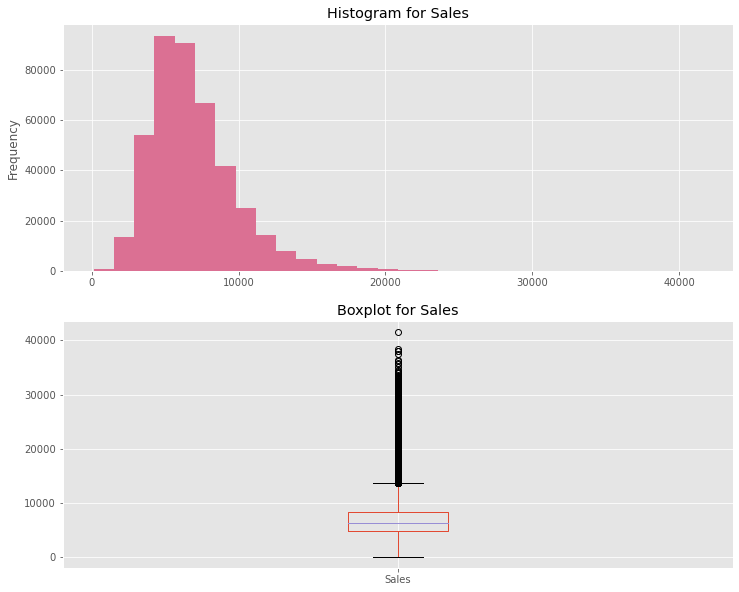

In [8]:
# histogram - box plot (특이점 확인)
f, ax = plt.subplots(2,1, figsize = (12, 10))
df_opened.Sales.plot(kind = "hist", title = "Histogram for Sales", bins = 30, ax = ax[0], color='palevioletred')
df_opened.Sales.plot.box(title = "Boxplot for Sales", ax = ax[1] )

### customer 살펴보기

In [9]:
train.Customers.describe()

count    1.017209e+06
mean     6.331459e+02
std      4.644117e+02
min      0.000000e+00
25%      4.050000e+02
50%      6.090000e+02
75%      8.370000e+02
max      7.388000e+03
Name: Customers, dtype: float64

Text(0.5, 1.0, 'Boxplot for Customers by Day of week')

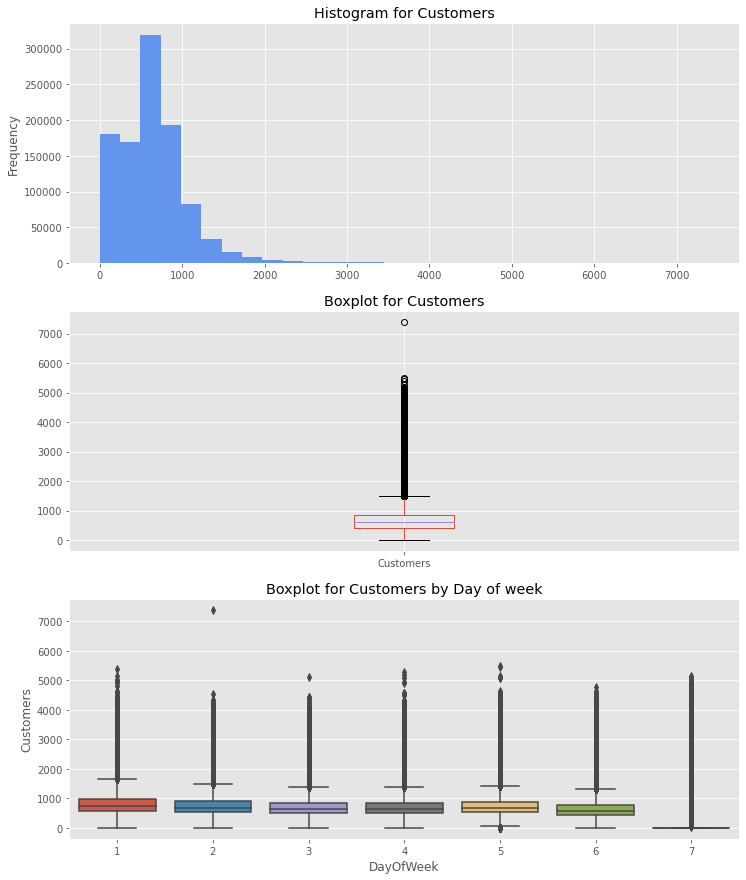

In [10]:
f, ax = plt.subplots(3,1, figsize = (12, 15))
train.Customers.plot(kind = "hist", title = "Histogram for Customers", bins = 30, ax = ax[0], color='cornflowerblue')
train.Customers.plot.box(title = "Boxplot for Customers", ax = ax[1])
sns.boxplot(x = "DayOfWeek", y = "Customers", data = train, ).set_title('Boxplot for Customers by Day of week')

In [11]:
# 가장 많은 customer가 방문한 날짜 확인 : 하루 관측. boxplot의 가장 위의 특이점이 이 부분에 해당함.
train[train.Customers == max(train.Customers)]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
993496,817,2,2013-01-22,27190,7388,1,1,0,0


In [12]:
# 가장 적은 customer가 방문한 날짜 확인 : customer==0인 날은 많음
train[train.Customers == min(train.Customers)]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
291,292,5,2015-07-31,0,0,0,1,0,1
875,876,5,2015-07-31,0,0,0,1,0,1
1406,292,4,2015-07-30,0,0,0,1,0,1
1990,876,4,2015-07-30,0,0,0,1,0,1
2521,292,3,2015-07-29,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


### open 변수 살펴보기

In [13]:
print("# Opened Case 살펴보기")
print("일요일에도 문을 연 횟수 : ", train[(train.Open == 1) & (train.DayOfWeek == 7)].count()[0])
print()
print("# Closed Case 살펴보기")
print("3년간 closed 횟수 : ", train[(train.Open == 0)].count()[0], "times closed")
print("holidays로 인해 closed한 횟수 : ", train[(train.Open == 0) & ((train.StateHoliday == "a") | (train.StateHoliday == "b") | (train.StateHoliday == "c"))].count()[0])
print("school holidays로 인해 closed한 횟수 : ",train[(train.Open == 0) & (train.SchoolHoliday == 1)].count()[0])
print()
print("+) Holiday나 Sunday아니지만 문을 닫은 횟수 : ", train[(train.Open == 0) & ((train.StateHoliday == "0") | (train.StateHoliday == 0)) & (train.SchoolHoliday == 0)].count()[0])

# Opened Case 살펴보기
일요일에도 문을 연 횟수 :  3593

# Closed Case 살펴보기
3년간 closed 횟수 :  172817 times closed
holidays로 인해 closed한 횟수 :  30140
school holidays로 인해 closed한 횟수 :  18264

+) Holiday나 Sunday아니지만 문을 닫은 횟수 :  139610


### promotion 살펴보기

In [14]:
print("Promotion 진행 : ", round((train.Promo[train.Promo == 1].count() / train.shape[0] * 100), 2), "%")

Promotion 진행 :  38.15 %


### StateHoliday 살펴보기

In [15]:
# StateHoliday는 연속적 데이터 아닌 것으로 확인
train.StateHoliday.value_counts()

0    855087
0    131072
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

Text(0.5, 1.0, 'Countplot for StateHoliday')

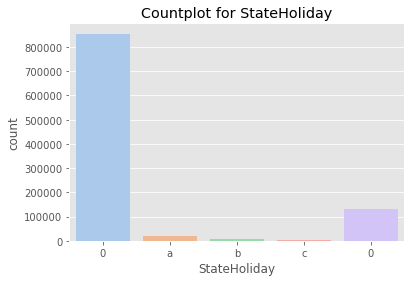

In [16]:
sns.countplot(x = "StateHoliday", data = train, palette='pastel').set_title('Countplot for StateHoliday')

In [17]:
# StateHoliday - 0type vs a,b,c로 나뉘는 걸로 생각하고 0, 1로 변환해서 새로운 column으로 추가
train["StateHoliday_cat"] = train["StateHoliday"].map({0:0, "0": 0, "a": 1, "b": 1, "c": 1})
train = train.drop("StateHoliday", axis = 1)
train.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,StateHoliday_cat
1017204,1111,2,2013-01-01,0,0,0,0,1,1
1017205,1112,2,2013-01-01,0,0,0,0,1,1
1017206,1113,2,2013-01-01,0,0,0,0,1,1
1017207,1114,2,2013-01-01,0,0,0,0,1,1
1017208,1115,2,2013-01-01,0,0,0,0,1,1


In [18]:
# Open과 Sales가 0인 것은 제외하기. 결측치를 채우기 보다 평가에서 제외시킴
train = train.drop(train[(train.Open == 0) & (train.Sales == 0)].index)
train = train.reset_index(drop = True) 
train.isnull().sum()

Store               0
DayOfWeek           0
Date                0
Sales               0
Customers           0
Open                0
Promo               0
SchoolHoliday       0
StateHoliday_cat    0
dtype: int64

#### Store 살펴보기

In [19]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


median :  2325.0 
mean : 5404.901079136691


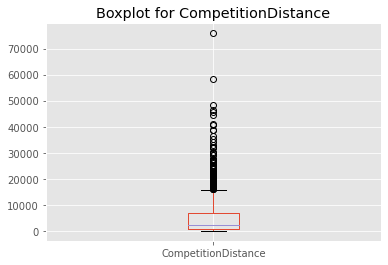

In [20]:
# 분포를 살펴보고 fillna 값을 뭘로 할지 생각해보기
store.CompetitionDistance.plot.box(title='Boxplot for CompetitionDistance') 
print("median : ", store.CompetitionDistance.median(), "\nmean :", store.CompetitionDistance.mean())

### store의 결측치 채워주기 : Median and Zero

In [21]:
# store의 CompetitionDistance에 대해서는 median으로 결측치 채워주기
store["CompetitionDistance"].fillna(store["CompetitionDistance"].median(), inplace = True)

In [22]:
# CompetitionOpenSinceMonth와 -Year은 0으로 결측치 채워주기
store["CompetitionOpenSinceMonth"].fillna(0, inplace = True)
store["CompetitionOpenSinceYear"].fillna(0, inplace = True)

In [23]:
store.groupby(by = "Promo2", axis = 0).count()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2SinceWeek,Promo2SinceYear,PromoInterval
Promo2,,,,,,,,,
0,544,544,544,544,544,544,0,0,0
1,571,571,571,571,571,571,571,571,571


In [24]:
# Promo 3개의 칼럼도 0으로 결측치 채워주기
store["Promo2SinceWeek"].fillna(0, inplace = True)
store["Promo2SinceYear"].fillna(0, inplace = True)
store["PromoInterval"].fillna(0, inplace = True)

In [25]:
# 결측치 확인
store.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

### Store + Train merge하여 살펴보기

In [26]:
train_store = pd.merge(train, store, how = "left", on = "Store")
train_store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844392 entries, 0 to 844391
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Store                      844392 non-null  int64  
 1   DayOfWeek                  844392 non-null  int64  
 2   Date                       844392 non-null  object 
 3   Sales                      844392 non-null  int64  
 4   Customers                  844392 non-null  int64  
 5   Open                       844392 non-null  int64  
 6   Promo                      844392 non-null  int64  
 7   SchoolHoliday              844392 non-null  int64  
 8   StateHoliday_cat           844392 non-null  int64  
 9   StoreType                  844392 non-null  object 
 10  Assortment                 844392 non-null  object 
 11  CompetitionDistance        844392 non-null  float64
 12  CompetitionOpenSinceMonth  844392 non-null  float64
 13  CompetitionOpenSinceYear   84

In [27]:
# 당일 매출액인 Sales를 Customers로 나눠 Customer당 평균 매출금액에 대한 칼럼을 하나 추가
train_store["Avg_Customer_Sales"] = train_store.Sales / train_store.Customers

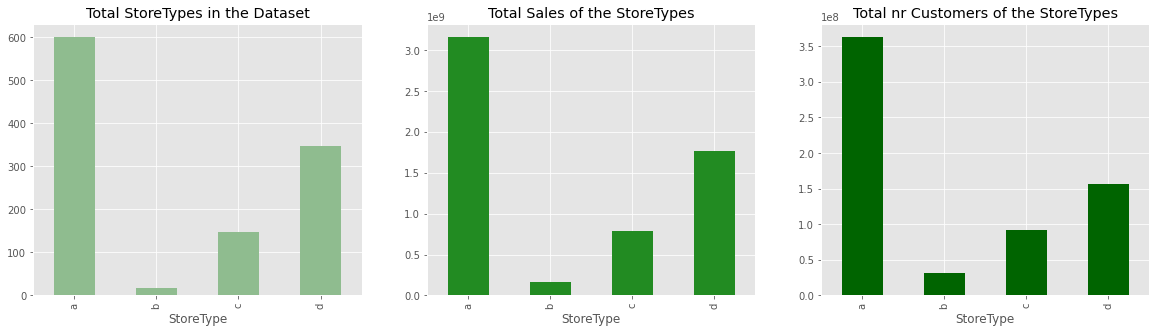

In [29]:
f, ax = plt.subplots(1, 3, figsize = (20,5))
store.groupby("StoreType")["Store"].count().plot(kind = "bar", ax = ax[0], title = "Total StoreTypes in the Dataset", color = 'darkseagreen' )
train_store.groupby("StoreType")["Sales"].sum().plot(kind = "bar", ax = ax[1], title = "Total Sales of the StoreTypes", color='forestgreen')
train_store.groupby("StoreType")["Customers"].sum().plot(kind = "bar", ax = ax[2], title = "Total nr Customers of the StoreTypes", color='darkgreen')
plt.subplots_adjust(hspace = 0.3)
plt.show()

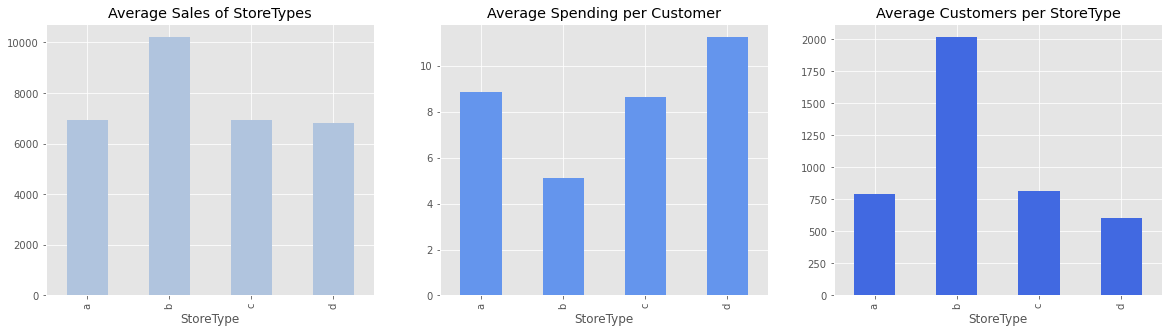

In [30]:
f, ax = plt.subplots(1, 3, figsize = (20,5))
train_store.groupby("StoreType")["Sales"].mean().plot(kind = "bar", ax = ax[0], title = "Average Sales of StoreTypes", color = 'lightsteelblue')
train_store.groupby("StoreType")["Avg_Customer_Sales"].mean().plot(kind = "bar", ax = ax[1], title = "Average Spending per Customer", color = 'cornflowerblue')
train_store.groupby("StoreType")["Customers"].mean().plot(kind = "bar", ax = ax[2], title = "Average Customers per StoreType", color = 'royalblue')
plt.subplots_adjust(hspace = 0.3)
plt.show() 

#### Assortments 타입

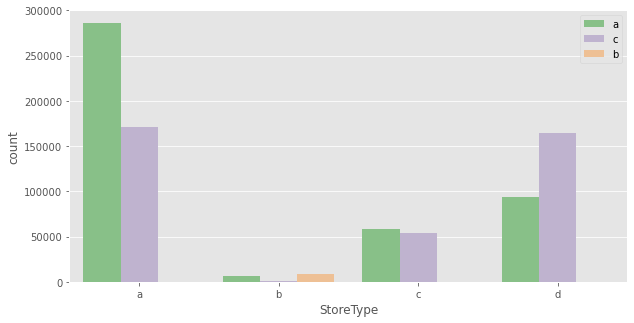

In [31]:
plt.figure(figsize=(10, 5))
sns.countplot(data = train_store, x = "StoreType", hue = "Assortment", order=["a","b","c","d"], palette='Accent') 
plt.legend(loc='upper right')
plt.show()

#### Promotion 분류

In [32]:
train_store.Date = train_store.Date.astype("datetime64[ns]")
train_store["Month"] = train_store.Date.dt.month
train_store["Year"] = train_store.Date.dt.year
train_store["Day"] = train_store.Date.dt.day

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


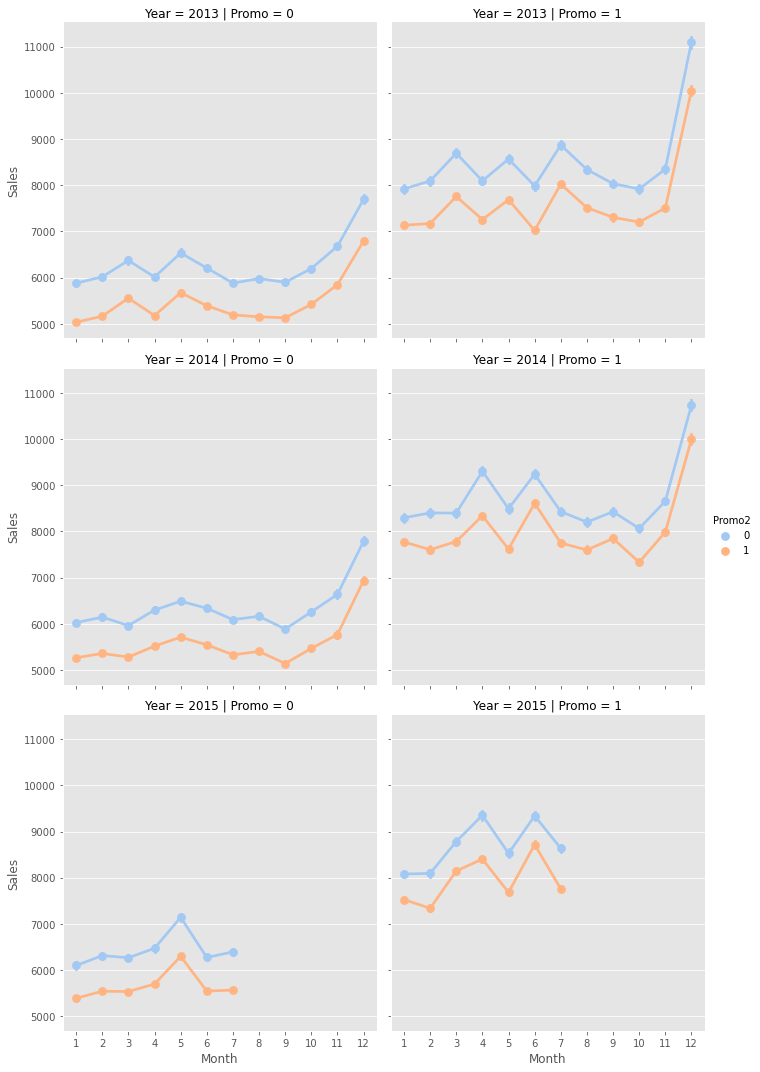

In [33]:
sns.factorplot(data = train_store, x ="Month", y = "Sales", col = 'Promo',hue = 'Promo2',row = "Year", palette='pastel')

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 720x360 with 0 Axes>

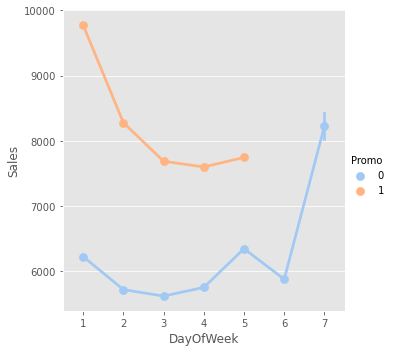

In [34]:
plt.figure(figsize=(10, 5))
sns.factorplot(data = train_store, x = "DayOfWeek", y = "Sales", hue = "Promo", palette='pastel')

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


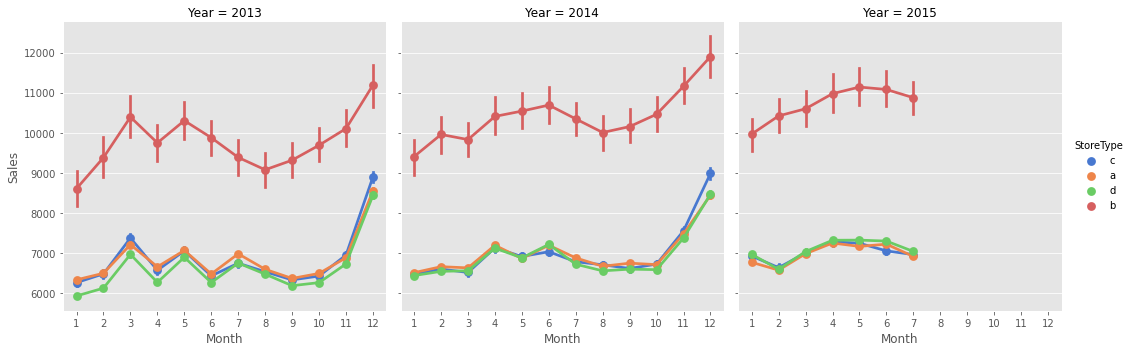

In [35]:
# Sales에 월별로 특이한 경향이 뚜렷이 보이진 않음. 연말에 대한 증가정도,,,
sns.factorplot(data = train_store, x = "Month", y = "Sales", col = "Year", hue = "StoreType", palette='muted')

#### Heat map으로 상관관계 보기

In [36]:
# 'Promo', 'SchoolHoliday', 'Promo2'는 이미 numerical이니 제외하고 나머지에 대해 type을 category로 변환 
train_store["StoreType"] = train_store["StoreType"].astype("category")
train_store["Assortment"] = train_store["Assortment"].astype("category")
train_store["PromoInterval"] = train_store["PromoInterval"].astype("category")

train_store["StoreType_cat"] = train_store["StoreType"].cat.codes
train_store["Assortment_cat"] = train_store["Assortment"].cat.codes
train_store["PromoInterval_cat"] = train_store["Assortment"].cat.codes

train_store["StateHoliday_cat"] = train_store["StateHoliday_cat"].astype("float")
train_store["StoreType_cat"] = train_store["StoreType_cat"].astype("float")
train_store["Assortment_cat"] = train_store["Assortment_cat"].astype("float")
train_store["PromoInterval_cat"] = train_store["PromoInterval_cat"].astype("float")

In [37]:
train_store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844392 entries, 0 to 844391
Data columns (total 25 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Store                      844392 non-null  int64         
 1   DayOfWeek                  844392 non-null  int64         
 2   Date                       844392 non-null  datetime64[ns]
 3   Sales                      844392 non-null  int64         
 4   Customers                  844392 non-null  int64         
 5   Open                       844392 non-null  int64         
 6   Promo                      844392 non-null  int64         
 7   SchoolHoliday              844392 non-null  int64         
 8   StateHoliday_cat           844392 non-null  float64       
 9   StoreType                  844392 non-null  category      
 10  Assortment                 844392 non-null  category      
 11  CompetitionDistance        844392 non-null  float64 

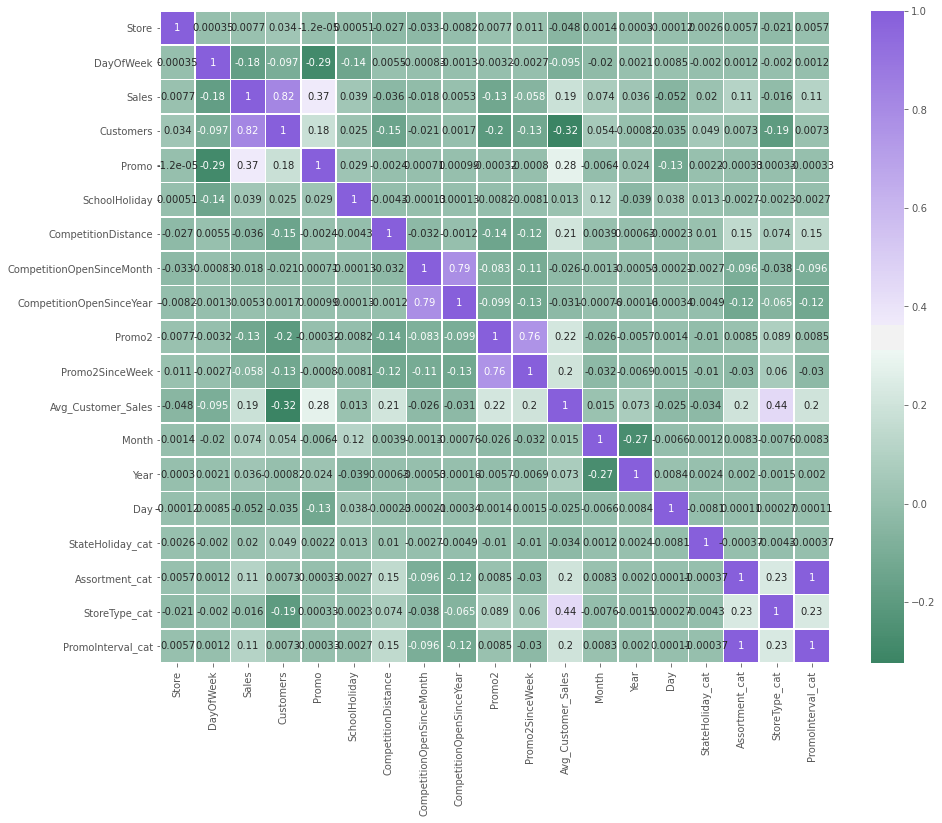

In [38]:
correlation_heatmap = train_store[["Store", "DayOfWeek", "Sales", "Customers", "Promo", "SchoolHoliday", "CompetitionDistance", 
                                 "CompetitionOpenSinceMonth", "CompetitionOpenSinceYear", "Promo2", "Promo2SinceWeek", "Avg_Customer_Sales", 
                                 "Month", "Year", "Day", "StateHoliday_cat", "Assortment_cat", "StoreType_cat", "PromoInterval_cat"]]

f, ax = plt.subplots(figsize = (15, 12))
sns.heatmap(correlation_heatmap.corr(),ax = ax, annot=True, cmap=sns.diverging_palette(150, 275, as_cmap=True), linewidths=0.5)

In [39]:
# category로 변경이 필요
train_store.CompetitionDistance.describe()

count    844392.000000
mean       5449.868829
std        7800.946702
min          20.000000
25%         710.000000
50%        2325.000000
75%        6880.000000
max       75860.000000
Name: CompetitionDistance, dtype: float64

In [40]:
train_store["CompetitionDistance_Cat"] = pd.cut(train_store["CompetitionDistance"], 5)

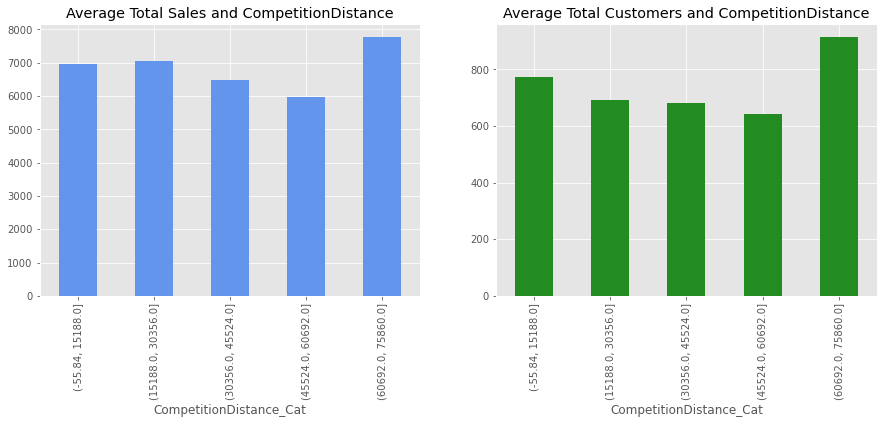

In [62]:
f, ax = plt.subplots(1,2, figsize = (15,5))
train_store.groupby(by = "CompetitionDistance_Cat").Sales.mean().plot(kind = "bar", title = "Average Total Sales and CompetitionDistance", ax = ax[0], color='cornflowerblue')
train_store.groupby(by = "CompetitionDistance_Cat").Customers.mean().plot(kind = "bar", title = "Average Total Customers and CompetitionDistance", ax = ax[1], color='forestgreen')

### Modeling : Random Forest Regression

In [42]:
train_store["CompetitionOpenPeriod"] = np.where((train_store["CompetitionOpenSinceMonth"] == 0) & (train_store["CompetitionOpenSinceYear"] == 0), 0,(train_store.Month - train_store.CompetitionOpenSinceMonth) + (12 *(train_store.Year - train_store.CompetitionOpenSinceYear)))
train_store = train_store.drop(["CompetitionOpenSinceMonth", "CompetitionOpenSinceYear"], axis = 1)

In [43]:
# 3번째 dummies는 선택적
ts_4_split = train_store.copy()
ts_4_split = train_store.drop(["Date","StoreType", "Assortment", "PromoInterval", "CompetitionDistance_Cat"], axis = 1)
ts_rfr = pd.get_dummies(ts_4_split, columns = ["Assortment_cat", "StoreType_cat", "PromoInterval_cat"], prefix = ["is_Assortment", "is_StoreType", "is_PromoInterval"]) #  dummies 생성

In [44]:
from sklearn import model_selection
from sklearn import metrics

features = ts_4_split.drop(["Customers", "Sales", "Avg_Customer_Sales"], axis = 1)
target = ts_4_split["Sales"]

X_train, X_test, y_train, y_test = model_selection.train_test_split(features, target, test_size = 0.20, random_state = 15) 
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(675513, 17) (168879, 17) (675513,) (168879,)


회귀 평가 지표 중, RMSE를 사용.  
MSE 값은 오류의 제곱을 구하므로 실제 오류 평균보다 더 커지는 특성이 있으므로 MSE에 루트를 씌운 RMSE를 사용하여 회귀 평가를 수행해봄.

In [45]:
import math
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

rfr = RandomForestRegressor(n_estimators=10)
rfr.fit(X_train, y_train)
rfr_prediction = rfr.predict(X_test)
rms_rfr = math.sqrt(mean_squared_error(y_test, rfr_prediction))
print("RMS:", rms_rfr)

RMS: 984.7114333108763


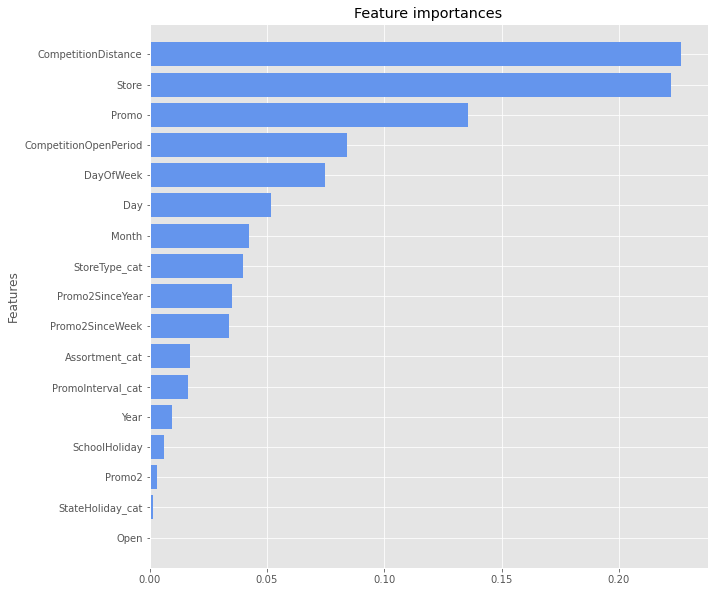

In [46]:
import itertools

features_ranked=[]
importances = rfr.feature_importances_
std = np.std([rfr.feature_importances_ for tree in rfr.estimators_],axis=0)
indices = np.argsort(importances)

for f in range(X_train.shape[1]):
    features_ranked.append(X_train.columns[indices[f]])

plt.figure(figsize=(10,10))
plt.title("Feature importances")
plt.barh(range(X_train.shape[1]), importances[indices],
            color='cornflowerblue', align="center")
plt.yticks(range(X_train.shape[1]), features_ranked)
plt.ylabel('Features')
plt.ylim([-1, X_train.shape[1]])
plt.show()

### Modeling : XGBoost

In [58]:
def rmspe(y, prediction):
    return np.sqrt(np.mean((prediction/y-1)**2))
def rmspe_xg(prediction, y):
    y = np.expm1(y.get_label())
    prediction = np.expm1(prediction)
    return 'rmspe', rmspe(y,prediction)

In [59]:
import xgboost as xgb

param = {'max_depth':10, 
         "booster": "gbtree",  
         'eta':1, 
         'silent':1,
         'objective':'reg:linear'}
num_round = 100 

dtrain = xgb.DMatrix(X_train, y_train)
dtest = xgb.DMatrix(X_test, y_test)
watchlist = [(dtrain, 'train'), (dtest, 'eval')]

xgboost = xgb.train(param, dtrain, num_round, evals=watchlist, \
  early_stopping_rounds= 100, feval=rmspe_xg, verbose_eval=True)
         
preds = xgboost.predict(dtest)

[00:54:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[00:54:45] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in expm1
  after removing the cwd from sys.path.
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in expm1
  """


[0]	train-rmse:2274.77148	eval-rmse:2280.62476	train-rmspe:nan	eval-rmspe:nan
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 100 rounds.


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


[1]	train-rmse:2150.54053	eval-rmse:2172.11597	train-rmspe:nan	eval-rmspe:nan
[2]	train-rmse:1908.48376	eval-rmse:1936.47156	train-rmspe:nan	eval-rmspe:nan
[3]	train-rmse:1790.49561	eval-rmse:1818.58643	train-rmspe:nan	eval-rmspe:nan
[4]	train-rmse:1684.40381	eval-rmse:1714.69690	train-rmspe:nan	eval-rmspe:nan
[5]	train-rmse:1444.00537	eval-rmse:1478.74622	train-rmspe:nan	eval-rmspe:nan
[6]	train-rmse:1334.69739	eval-rmse:1370.92078	train-rmspe:nan	eval-rmspe:nan
[7]	train-rmse:1269.44104	eval-rmse:1309.71509	train-rmspe:nan	eval-rmspe:nan
[8]	train-rmse:1225.18042	eval-rmse:1271.75476	train-rmspe:nan	eval-rmspe:nan
[9]	train-rmse:1173.65845	eval-rmse:1221.34070	train-rmspe:nan	eval-rmspe:nan
[10]	train-rmse:1085.93018	eval-rmse:1136.87073	train-rmspe:nan	eval-rmspe:nan
[11]	train-rmse:1026.87903	eval-rmse:1082.00940	train-rmspe:nan	eval-rmspe:nan
[12]	train-rmse:994.45013	eval-rmse:1052.96997	train-rmspe:nan	eval-rmspe:nan
[13]	train-rmse:973.66229	eval-rmse:1036.36243	train-rmspe:nan

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


[55]	train-rmse:682.89642	eval-rmse:866.50842	train-rmspe:nan	eval-rmspe:nan
[56]	train-rmse:678.21564	eval-rmse:864.43152	train-rmspe:nan	eval-rmspe:nan
[57]	train-rmse:673.84644	eval-rmse:862.83197	train-rmspe:nan	eval-rmspe:nan
[58]	train-rmse:670.48431	eval-rmse:862.42383	train-rmspe:nan	eval-rmspe:nan
[59]	train-rmse:666.80115	eval-rmse:861.51532	train-rmspe:nan	eval-rmspe:nan
[60]	train-rmse:664.13287	eval-rmse:860.89282	train-rmspe:nan	eval-rmspe:nan
[61]	train-rmse:662.42334	eval-rmse:860.54388	train-rmspe:nan	eval-rmspe:nan
[62]	train-rmse:658.80084	eval-rmse:860.09979	train-rmspe:nan	eval-rmspe:nan
[63]	train-rmse:654.58582	eval-rmse:857.90918	train-rmspe:nan	eval-rmspe:nan
[64]	train-rmse:652.99609	eval-rmse:857.44379	train-rmspe:nan	eval-rmspe:nan
[65]	train-rmse:649.80096	eval-rmse:856.47803	train-rmspe:nan	eval-rmspe:nan
[66]	train-rmse:646.09711	eval-rmse:855.06000	train-rmspe:nan	eval-rmspe:nan
[67]	train-rmse:642.96033	eval-rmse:854.21344	train-rmspe:nan	eval-rmspe:nan

In [61]:
rms_xgboost = math.sqrt(mean_squared_error(y_test, preds))
print('RMS:', rms_xgboost)

RMS: 841.9207318782647
